In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, auc, roc_curve, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [456]:
data = pd.read_csv("winequality-red.csv")

In [457]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
536,9.9,0.63,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
609,6.3,0.36,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,6
1430,7.4,0.41,0.24,1.8,0.066,18.0,47.0,0.99560,3.37,0.62,10.4,5
880,9.2,0.56,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9,5
784,7.1,0.59,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,5


In [458]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [459]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [460]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [461]:
data.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [462]:
y = data.quality
X= data.drop(labels="quality",axis=1)

In [463]:
replacement_dict = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1}
y = y.map(replacement_dict)

(array([744.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 855.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

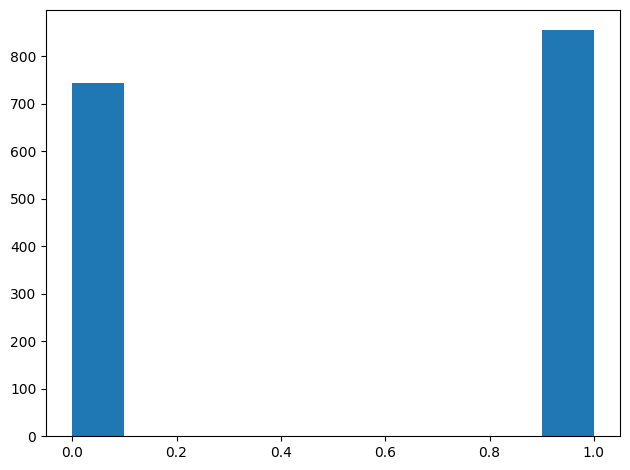

In [465]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(y)

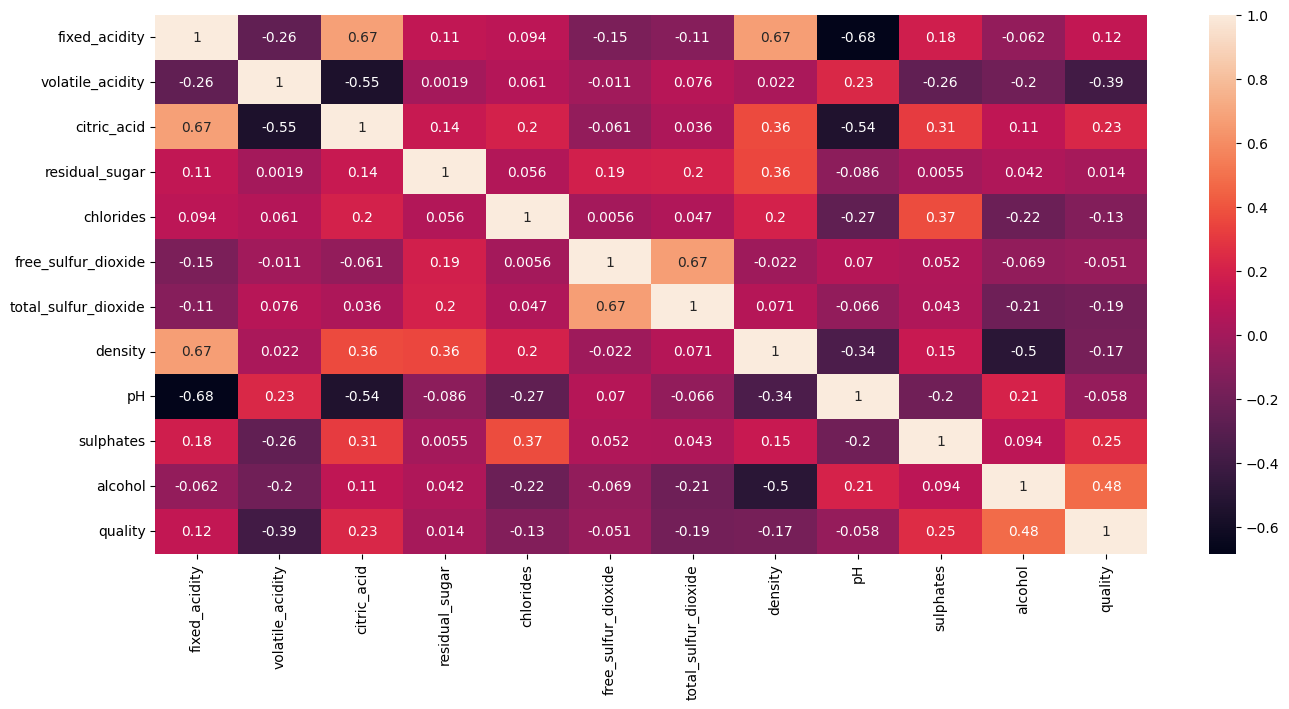

In [466]:
import seaborn as sns 
plt.figure(figsize=(16,7))
ax = sns.heatmap(data.corr(), annot=True)

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 42)

In [471]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [473]:
warnings.filterwarnings('ignore') 
classifiers = [RandomForestClassifier, DecisionTreeClassifier, SVC, LogisticRegression, KNeighborsClassifier, GaussianNB, XGBClassifier]
classifiers_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'XGBClassifier']

classifiers_scores = []

for classifier, name in zip(classifiers, classifiers_names):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    model = classifier() 
    cv_score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    classifiers_scores.append(cv_score.mean())

classifiers_df = pd.DataFrame({'Classifier': classifiers_names, 'Score': classifiers_scores})
classifiers_df

,Classifier,Score
0,RandomForestClassifier,0.821175
1,DecisionTreeClassifier,0.774866
2,SVC,0.632280
3,LogisticRegression,0.738612
4,KNeighborsClassifier,0.654186
5,GaussianNB,0.725468
6,XGBClassifier,0.822410


Random Forest

In [476]:
param_grid = {'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

est = RandomForestClassifier()
rfc = GridSearchCV(estimator = est, param_grid = param_grid, scoring ='accuracy', cv = 5,verbose=0)
rfc.fit(X_train,y_train)
print(rfc.best_score_)
print(rfc.best_params_)

0.8182252440725243
{'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [538]:
y_pred = rfc.predict(X_test)
print("Random Forest\n",classification_report(y_test, y_pred))

Random Forest
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       178
           1       0.81      0.83      0.82       222

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



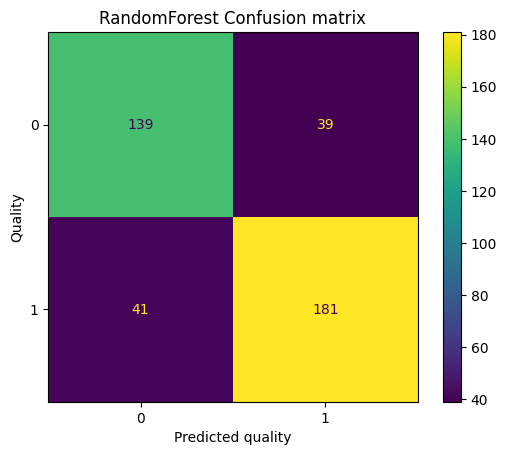

In [535]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title='RandomForest Confusion matrix', 
                xlabel='Predicted quality', 
                ylabel='Quality')
plt.show()

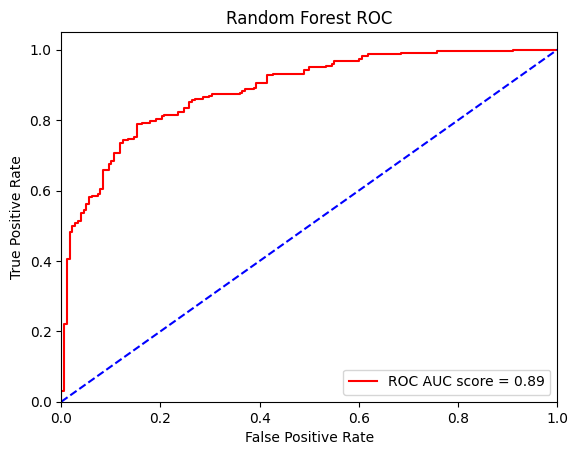

In [539]:
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, 'red',label='ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.show()

In [480]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
xgb_model = XGBClassifier(n_estimators=20)

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),  
    "max_depth": randint(2, 6), 
    "n_estimators": randint(100, 150), 
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)


search.fit(X_train, y_train)
report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.792 (std: 0.010)
Parameters: {'colsample_bytree': 0.9987494125088112, 'gamma': 0.3484625279319074, 'learning_rate': 0.14526054941376598, 'max_depth': 4, 'n_estimators': 110, 'subsample': 0.7123852758368922}



In [482]:
search.score(X_test,y_test)

0.805

In [484]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       178
           1       0.81      0.83      0.82       222

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



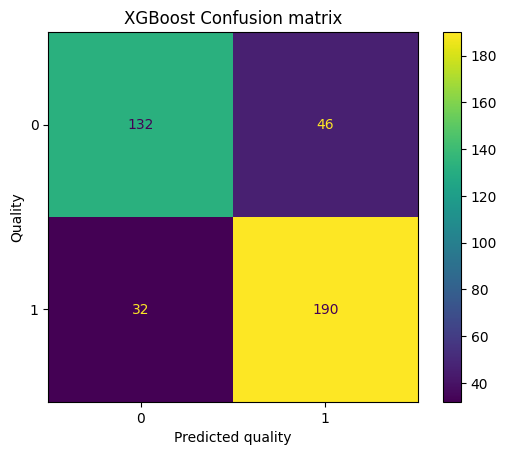

In [533]:
cm = confusion_matrix(y_test, search.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title='XGBoost Confusion matrix', 
                xlabel='Predicted quality', 
                ylabel='Quality')
plt.show()

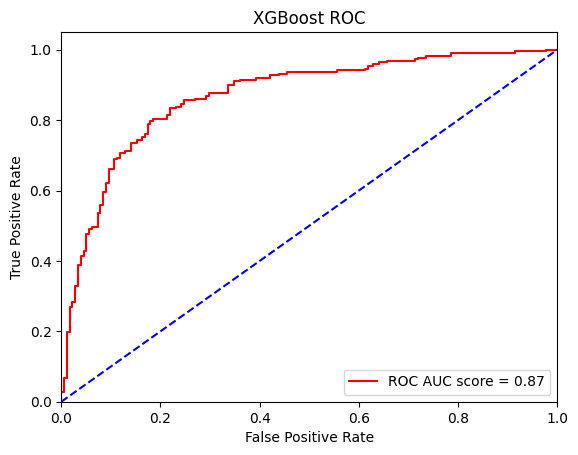

In [540]:
fpr, tpr, thresholds = roc_curve(y_test, search.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, 'red',label='ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC')
plt.show()

Best Validation Accuracy: 80.0000%


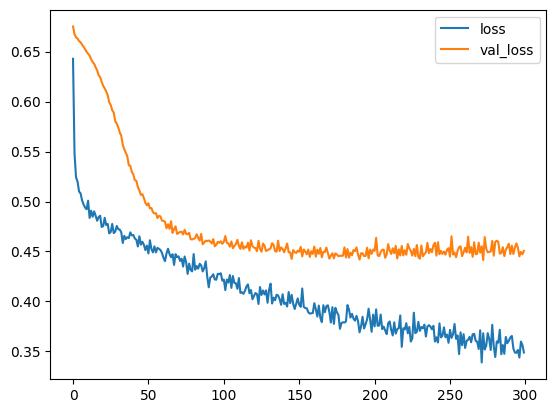

In [520]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input((11,)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),   

    layers.Dense(1, activation='sigmoid'),])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=300,
    verbose=0
)


history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

print("Best Validation Accuracy: {:0.4f}%".format(history_df['val_binary_accuracy'].max()*100))


In [521]:
y_pred = model.predict(X_test)
y_pred=np.where(y_pred<0.5,0,1)

print(classification_report(y_test, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       178
           1       0.82      0.82      0.82       222

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


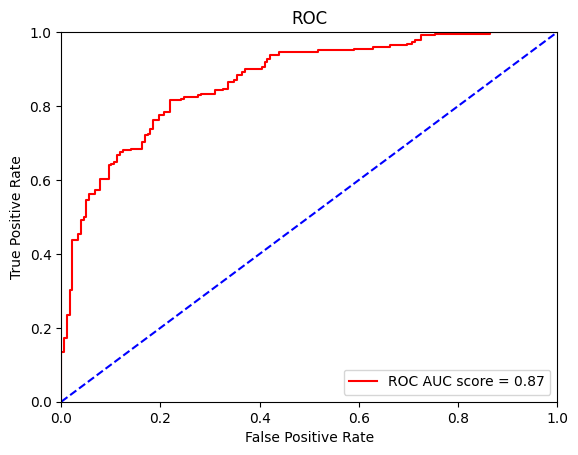

In [522]:
fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

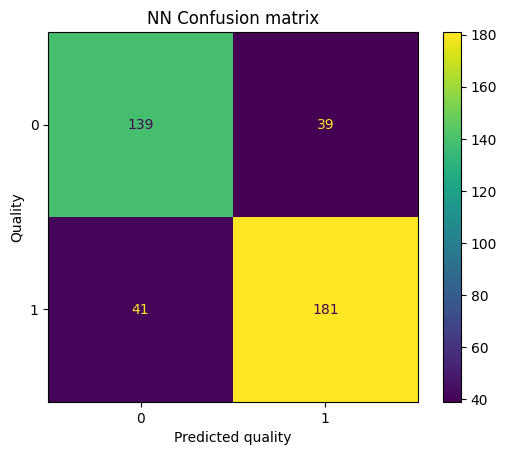

In [534]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set(title='NN Confusion matrix', 
                xlabel='Predicted quality', 
                ylabel='Quality')
plt.show()
